Read the loan.csv file using the Pandas library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
loan_data=pd.read_csv('loan.csv')

let's observe the columns

In [5]:
loan_data.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

Let's see the number of rows and columns of the dataframe

In [6]:
loan_data.shape

(39717, 111)

So we can see that the loan.csv file has 39717 entries and 111 features or columns<br>
Lets isolate the columns of our interest and remove the columns which are not necessary for our requirement to analyze whose loan application can be granted and whose to be discarded.


In [7]:
desired_col=['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','loan_status','purpose','dti']

In [8]:
loan_data_final=loan_data[desired_col]

In [9]:
loan_data_shortlist=loan_data_final[loan_data_final['loan_status']=='Charged Off']

In [10]:
loan_data_shortlist.shape

(5627, 15)

In [11]:
loan_data_shortlist.head(5)

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate grade  \
1        2500         2500           2500.0   60 months   15.27%     C   
8        5600         5600           5600.0   60 months   21.28%     F   
9        5375         5375           5350.0   60 months   12.69%     B   
12       9000         9000           9000.0   36 months   13.49%     C   
14      10000        10000          10000.0   36 months   10.65%     B   

   sub_grade                            emp_title emp_length home_ownership  \
1         C4                                Ryder   < 1 year           RENT   
8         F2                                  NaN    4 years            OWN   
9         B5                            Starbucks   < 1 year           RENT   
12        C1  Va. Dept of Conservation/Recreation   < 1 year           RENT   
14        B2                                SFMTA    3 years           RENT   

    annual_inc verification_status  loan_status             purpose    dti  
1      30000.0     Source Verified  Charged Off                 car   1.00  
8      40000.0     Source Verified  Charged Off      small_business   5.55  
9      15000.0            Verified  Charged Off               other  18.08  
12     30000.0     Source Verified  Charged Off  debt_consolidation  10.08  
14    100000.0     Source Verified  Charged Off               other   7.06

In [12]:
loan_data_shortlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            5627 non-null   int64  
 1   funded_amnt          5627 non-null   int64  
 2   funded_amnt_inv      5627 non-null   float64
 3   term                 5627 non-null   object 
 4   int_rate             5627 non-null   object 
 5   grade                5627 non-null   object 
 6   sub_grade            5627 non-null   object 
 7   emp_title            5143 non-null   object 
 8   emp_length           5399 non-null   object 
 9   home_ownership       5627 non-null   object 
 10  annual_inc           5627 non-null   float64
 11  verification_status  5627 non-null   object 
 12  loan_status          5627 non-null   object 
 13  purpose              5627 non-null   object 
 14  dti                  5627 non-null   float64
dtypes: float64(3), int64(2), object(10)
m

In the emp_title column 484 values are missing out of 5627 entries. If we calculate the missing value percentage then we get a value of 8.6% so as the percentage is less than 15% we can keep the column.<br> Lets analyze the missing values to get a better insight why they are missing.

In [13]:
loan_data_shortlist[loan_data_shortlist['emp_title'].isnull()]

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate grade  \
8           5600         5600      5600.000000   60 months   21.28%     F   
168         2500         2500      2500.000000   36 months    7.51%     A   
270        16000        16000     16000.000000   60 months   13.49%     C   
300        30000        30000     28673.796520   60 months   12.42%     B   
422         1000         1000      1000.000000   36 months   14.65%     C   
...          ...          ...              ...         ...      ...   ...   
39358      12000        12000       454.699934   36 months   13.30%     D   
39410       2225         2225      1225.000000   36 months    7.43%     A   
39519      20000        20000       310.979002   36 months   11.54%     C   
39613       5000         5000      1574.995234   36 months   12.17%     D   
39640       2125         2125       550.000000   36 months   15.01%     F   

      sub_grade emp_title emp_length home_ownership  annual_inc  \
8            F2       NaN    4 years            OWN     40000.0   
168          A3       NaN        NaN            OWN     12000.0   
270          C1       NaN  10+ years           RENT     35000.0   
300          B4       NaN    3 years           RENT     70000.0   
422          C3       NaN        NaN           RENT     18408.0   
...         ...       ...        ...            ...         ...   
39358        D4       NaN   < 1 year       MORTGAGE     45000.0   
39410        A2       NaN   < 1 year       MORTGAGE    120000.0   
39519        C5       NaN   < 1 year       MORTGAGE     96000.0   
39613        D2       NaN   < 1 year           RENT     10000.0   
39640        F1       NaN   < 1 year       MORTGAGE     96000.0   

      verification_status  loan_status             purpose    dti  
8         Source Verified  Charged Off      small_business   5.55  
168       Source Verified  Charged Off  debt_consolidation  16.30  
270              Verified  Charged Off      small_business  16.22  
300       Source Verified  Charged Off      small_business   0.94  
422          Not Verified  Charged Off      major_purchase   6.00  
...                   ...          ...                 ...    ...  
39358        Not Verified  Charged Off  debt_consolidation   4.67  
39410        Not Verified  Charged Off                 car   7.67  
39519        Not Verified  Charged Off      small_business  17.81  
39613        Not Verified  Charged Off      small_business   0.00  
39640        Not Verified  Charged Off      small_business  16.89  

[484 rows x 15 columns]

In [14]:
loan_data_shortlist[loan_data_shortlist['emp_title'].isnull() & loan_data_shortlist['emp_length'].isnull()]

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate grade  \
168         2500         2500       2500.00000   36 months    7.51%     A   
422         1000         1000       1000.00000   36 months   14.65%     C   
534         1700         1700       1700.00000   36 months    7.90%     A   
569         8575         8575       8575.00000   36 months   17.58%     D   
750        14125        14125      14125.00000   36 months   12.42%     B   
...          ...          ...              ...         ...      ...   ...   
32403       9000         9000       9000.00000   36 months    7.88%     A   
32411       9800         9800       9775.00000   36 months   13.11%     C   
32418       4000         4000       4000.00000   36 months   17.19%     E   
32545       1000         1000       1000.00000   36 months   10.25%     B   
32621      10000        10000       9731.17513   36 months   14.22%     C   

      sub_grade emp_title emp_length home_ownership  annual_inc  \
168          A3       NaN        NaN            OWN     12000.0   
422          C3       NaN        NaN           RENT     18408.0   
534          A4       NaN        NaN       MORTGAGE     37800.0   
569          D4       NaN        NaN       MORTGAGE     32000.0   
750          B4       NaN        NaN       MORTGAGE     45696.0   
...         ...       ...        ...            ...         ...   
32403        A5       NaN        NaN       MORTGAGE    200000.0   
32411        C2       NaN        NaN           RENT     33000.0   
32418        E3       NaN        NaN            OWN     37200.0   
32545        B2       NaN        NaN           RENT     10500.0   
32621        C5       NaN        NaN       MORTGAGE     36000.0   

      verification_status  loan_status             purpose    dti  
168       Source Verified  Charged Off  debt_consolidation  16.30  
422          Not Verified  Charged Off      major_purchase   6.00  
534          Not Verified  Charged Off    home_improvement  27.00  
569              Verified  Charged Off  debt_consolidation  22.54  
750              Verified  Charged Off  debt_consolidation  21.93  
...                   ...          ...                 ...    ...  
32403        Not Verified  Charged Off         educational   4.18  
32411        Not Verified  Charged Off  debt_consolidation   8.25  
32418        Not Verified  Charged Off    home_improvement   9.35  
32545        Not Verified  Charged Off         educational  21.37  
32621        Not Verified  Charged Off               other   3.83  

[216 rows x 15 columns]

In [15]:
loan_data_shortlist.loc[loan_data_shortlist['emp_title'].isnull() & loan_data_shortlist['emp_length'].isnull(),'emp_title']='unemployed'

In [16]:
loan_data_shortlist[loan_data_shortlist['emp_title']=='unemployed']

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate grade  \
168         2500         2500       2500.00000   36 months    7.51%     A   
422         1000         1000       1000.00000   36 months   14.65%     C   
534         1700         1700       1700.00000   36 months    7.90%     A   
569         8575         8575       8575.00000   36 months   17.58%     D   
750        14125        14125      14125.00000   36 months   12.42%     B   
...          ...          ...              ...         ...      ...   ...   
32403       9000         9000       9000.00000   36 months    7.88%     A   
32411       9800         9800       9775.00000   36 months   13.11%     C   
32418       4000         4000       4000.00000   36 months   17.19%     E   
32545       1000         1000       1000.00000   36 months   10.25%     B   
32621      10000        10000       9731.17513   36 months   14.22%     C   

      sub_grade   emp_title emp_length home_ownership  annual_inc  \
168          A3  unemployed        NaN            OWN     12000.0   
422          C3  unemployed        NaN           RENT     18408.0   
534          A4  unemployed        NaN       MORTGAGE     37800.0   
569          D4  unemployed        NaN       MORTGAGE     32000.0   
750          B4  unemployed        NaN       MORTGAGE     45696.0   
...         ...         ...        ...            ...         ...   
32403        A5  unemployed        NaN       MORTGAGE    200000.0   
32411        C2  unemployed        NaN           RENT     33000.0   
32418        E3  unemployed        NaN            OWN     37200.0   
32545        B2  unemployed        NaN           RENT     10500.0   
32621        C5  unemployed        NaN       MORTGAGE     36000.0   

      verification_status  loan_status             purpose    dti  
168       Source Verified  Charged Off  debt_consolidation  16.30  
422          Not Verified  Charged Off      major_purchase   6.00  
534          Not Verified  Charged Off    home_improvement  27.00  
569              Verified  Charged Off  debt_consolidation  22.54  
750              Verified  Charged Off  debt_consolidation  21.93  
...                   ...          ...                 ...    ...  
32403        Not Verified  Charged Off         educational   4.18  
32411        Not Verified  Charged Off  debt_consolidation   8.25  
32418        Not Verified  Charged Off    home_improvement   9.35  
32545        Not Verified  Charged Off         educational  21.37  
32621        Not Verified  Charged Off               other   3.83  

[216 rows x 15 columns]

In [17]:
loan_data_shortlist[loan_data_shortlist['emp_length'].isnull()]

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate grade  \
168         2500         2500       2500.00000   36 months    7.51%     A   
422         1000         1000       1000.00000   36 months   14.65%     C   
534         1700         1700       1700.00000   36 months    7.90%     A   
569         8575         8575       8575.00000   36 months   17.58%     D   
750        14125        14125      14125.00000   36 months   12.42%     B   
...          ...          ...              ...         ...      ...   ...   
32403       9000         9000       9000.00000   36 months    7.88%     A   
32411       9800         9800       9775.00000   36 months   13.11%     C   
32418       4000         4000       4000.00000   36 months   17.19%     E   
32545       1000         1000       1000.00000   36 months   10.25%     B   
32621      10000        10000       9731.17513   36 months   14.22%     C   

      sub_grade   emp_title emp_length home_ownership  annual_inc  \
168          A3  unemployed        NaN            OWN     12000.0   
422          C3  unemployed        NaN           RENT     18408.0   
534          A4  unemployed        NaN       MORTGAGE     37800.0   
569          D4  unemployed        NaN       MORTGAGE     32000.0   
750          B4  unemployed        NaN       MORTGAGE     45696.0   
...         ...         ...        ...            ...         ...   
32403        A5  unemployed        NaN       MORTGAGE    200000.0   
32411        C2  unemployed        NaN           RENT     33000.0   
32418        E3  unemployed        NaN            OWN     37200.0   
32545        B2  unemployed        NaN           RENT     10500.0   
32621        C5  unemployed        NaN       MORTGAGE     36000.0   

      verification_status  loan_status             purpose    dti  
168       Source Verified  Charged Off  debt_consolidation  16.30  
422          Not Verified  Charged Off      major_purchase   6.00  
534          Not Verified  Charged Off    home_improvement  27.00  
569              Verified  Charged Off  debt_consolidation  22.54  
750              Verified  Charged Off  debt_consolidation  21.93  
...                   ...          ...                 ...    ...  
32403        Not Verified  Charged Off         educational   4.18  
32411        Not Verified  Charged Off  debt_consolidation   8.25  
32418        Not Verified  Charged Off    home_improvement   9.35  
32545        Not Verified  Charged Off         educational  21.37  
32621        Not Verified  Charged Off               other   3.83  

[228 rows x 15 columns]

228 values are missing out of 5627 entries. If we calculate the missing value percentage then we get a value of 4.05% so as the percentage is very less than 15% we can keep the column.<br>
We should not impute the missing values in this column with other value as it will exagerate the result and may show diverse affect in the conclusion.

Let's remove the % sign and convert the data type of 'int_rate' column from object to float for better analysis 

In [18]:
loan_data_shortlist['int_rate']=loan_data_shortlist['int_rate'].str.replace('%','')
loan_data_shortlist['int_rate']=loan_data_shortlist['int_rate'].astype(float)

Lets add a column to indicate the employment status. 0 for unemployed and 1 for others

In [19]:
loan_data_shortlist['emp_status']=loan_data_shortlist['emp_title'].apply(lambda x:1 if x!='unemployed' else 0)

In [20]:
loan_data_shortlist.head(5)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate grade  \
1        2500         2500           2500.0   60 months     15.27     C   
8        5600         5600           5600.0   60 months     21.28     F   
9        5375         5375           5350.0   60 months     12.69     B   
12       9000         9000           9000.0   36 months     13.49     C   
14      10000        10000          10000.0   36 months     10.65     B   

   sub_grade                            emp_title emp_length home_ownership  \
1         C4                                Ryder   < 1 year           RENT   
8         F2                                  NaN    4 years            OWN   
9         B5                            Starbucks   < 1 year           RENT   
12        C1  Va. Dept of Conservation/Recreation   < 1 year           RENT   
14        B2                                SFMTA    3 years           RENT   

    annual_inc verification_status  loan_status             purpose    dti  \
1      30000.0     Source Verified  Charged Off                 car   1.00   
8      40000.0     Source Verified  Charged Off      small_business   5.55   
9      15000.0            Verified  Charged Off               other  18.08   
12     30000.0     Source Verified  Charged Off  debt_consolidation  10.08   
14    100000.0     Source Verified  Charged Off               other   7.06   

    emp_status  
1            1  
8            1  
9            1  
12           1  
14           1

In [21]:
loan_data_shortlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            5627 non-null   int64  
 1   funded_amnt          5627 non-null   int64  
 2   funded_amnt_inv      5627 non-null   float64
 3   term                 5627 non-null   object 
 4   int_rate             5627 non-null   float64
 5   grade                5627 non-null   object 
 6   sub_grade            5627 non-null   object 
 7   emp_title            5359 non-null   object 
 8   emp_length           5399 non-null   object 
 9   home_ownership       5627 non-null   object 
 10  annual_inc           5627 non-null   float64
 11  verification_status  5627 non-null   object 
 12  loan_status          5627 non-null   object 
 13  purpose              5627 non-null   object 
 14  dti                  5627 non-null   float64
 15  emp_status           5627 non-null   

In [22]:
loan_data_shortlist.term.unique()

array([' 60 months', ' 36 months'], dtype=object)

In [23]:
loan_data_shortlist.grade.unique()

array(['C', 'F', 'B', 'D', 'A', 'E', 'G'], dtype=object)

In [24]:
loan_data_shortlist.sub_grade.unique()

array(['C4', 'F2', 'B5', 'C1', 'B2', 'B4', 'B3', 'C2', 'D2', 'A5', 'B1',
       'C5', 'E4', 'D3', 'D5', 'A2', 'C3', 'A3', 'F1', 'D1', 'A4', 'E5',
       'E1', 'E3', 'D4', 'G2', 'G1', 'E2', 'F5', 'F3', 'F4', 'A1', 'G4',
       'G3', 'G5'], dtype=object)

In [25]:
loan_data_shortlist.emp_length.unique()

array(['< 1 year', '4 years', '3 years', '10+ years', '1 year', '9 years',
       '2 years', '8 years', '7 years', '5 years', nan, '6 years'],
      dtype=object)

In [26]:
loan_data_shortlist.emp_title.unique()

array(['Ryder', nan, 'Starbucks', ..., 'Universal Advertising',
       'Invision Power Services', 'Auto motors of miami'], dtype=object)

In [27]:
loan_data_shortlist.emp_title.value_counts()

unemployed                   216
Bank of America               20
US Army                       18
Walmart                       14
UPS                           12
                            ... 
U of D Jesuit High School      1
EEOC                           1
Life Ambulance                 1
R. Young Enterprise, Inc.      1
Auto motors of miami           1
Name: emp_title, Length: 4637, dtype: int64

In [28]:
loan_data_shortlist.int_rate.value_counts()

13.49    127
11.49    127
10.99     95
11.71     91
11.99     76
        ... 
7.42       1
20.69      1
18.53      1
14.18      1
18.72      1
Name: int_rate, Length: 332, dtype: int64

In [29]:
categorical_cols=['term','grade','sub_grade','home_ownership','verification_status','purpose','emp_status','emp_length']
numerical_cols=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','annual_inc','dti']

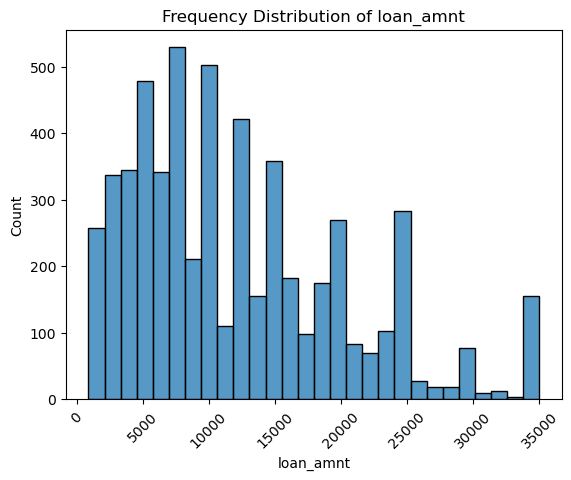

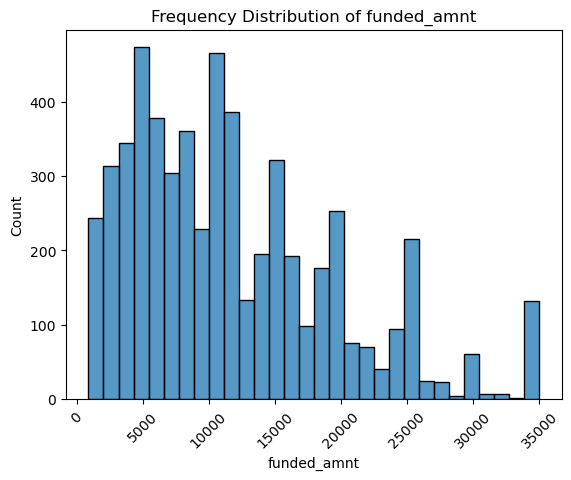

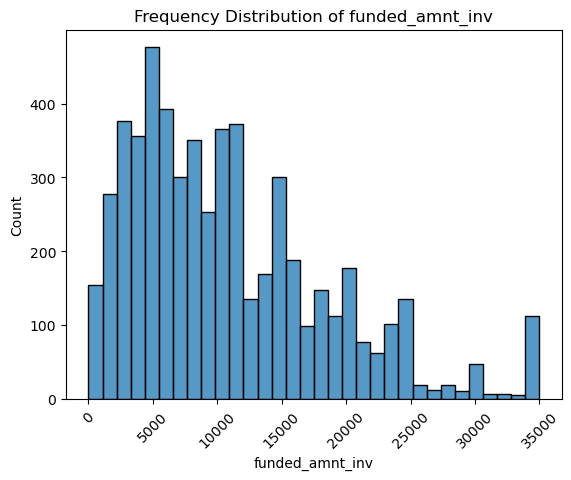

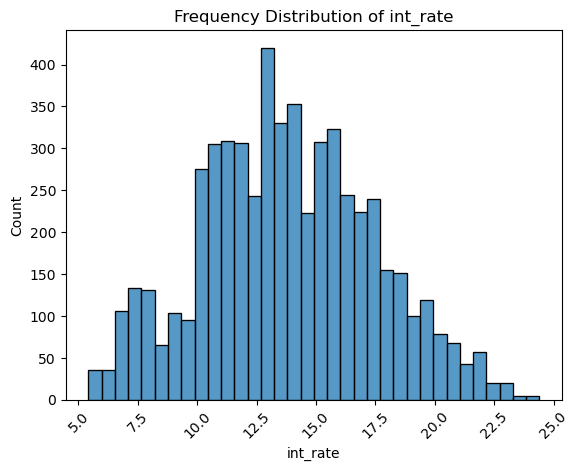

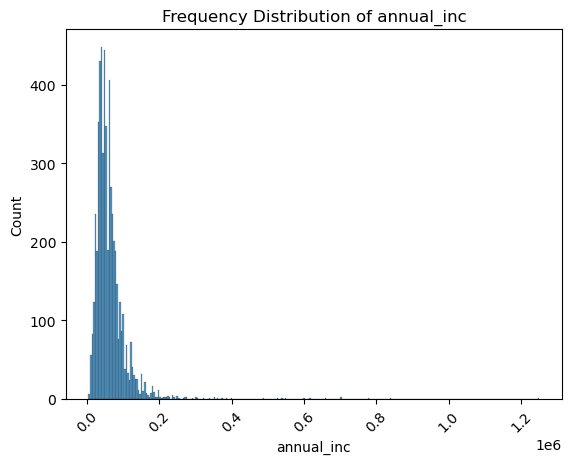

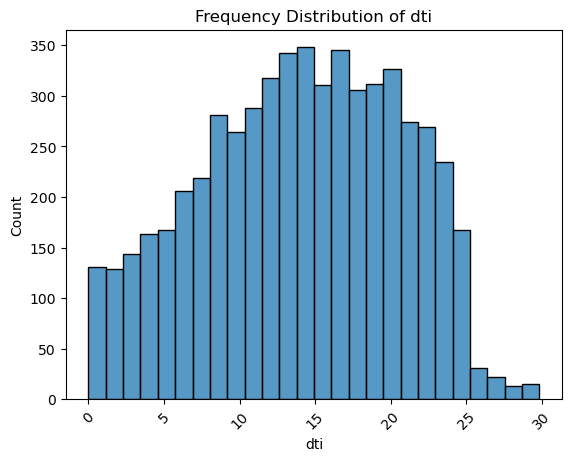

In [30]:
for i in numerical_cols:
    sns.histplot(loan_data_shortlist[i])
    plt.title('Frequency Distribution of '+i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    #plt.tight_layout()
    #plt.savefig('hist_numeric_{}.pdf'.format(i))

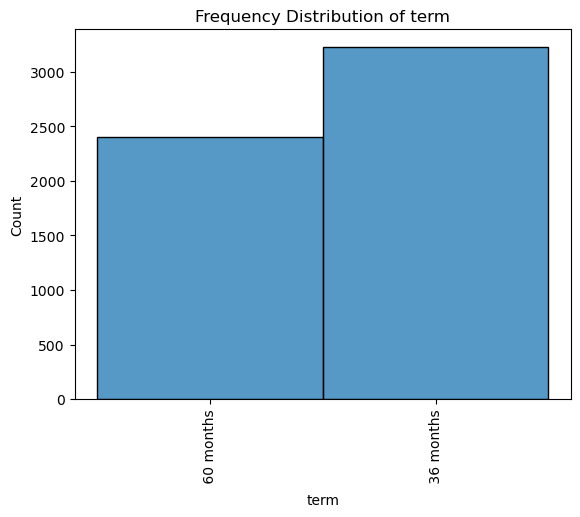

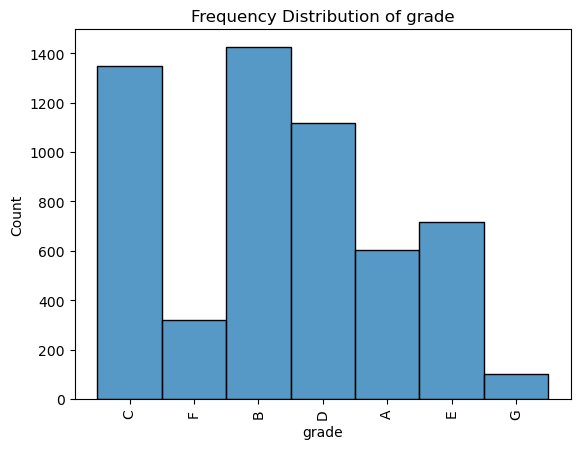

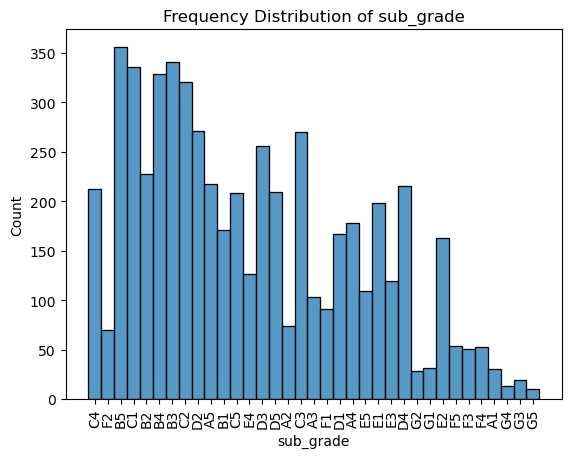

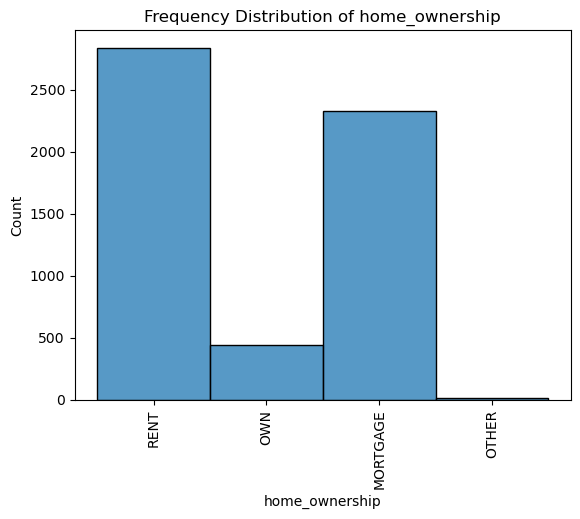

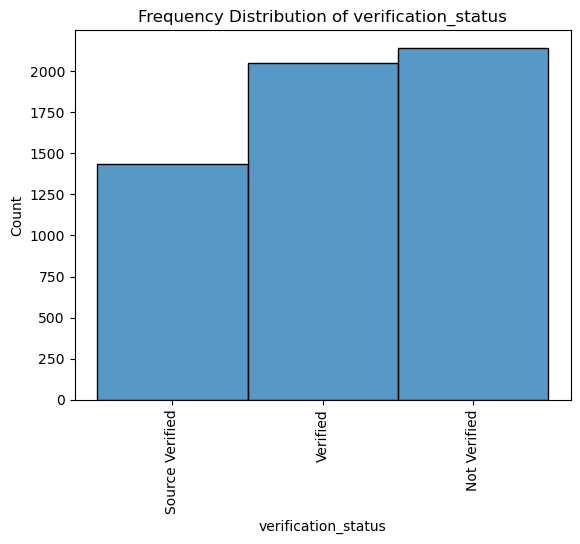

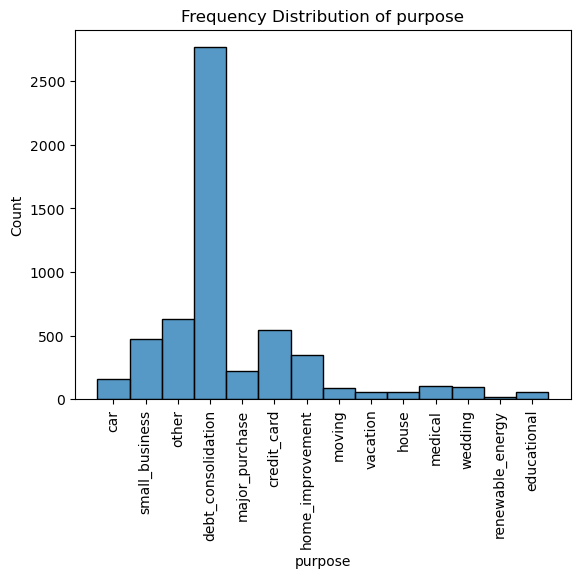

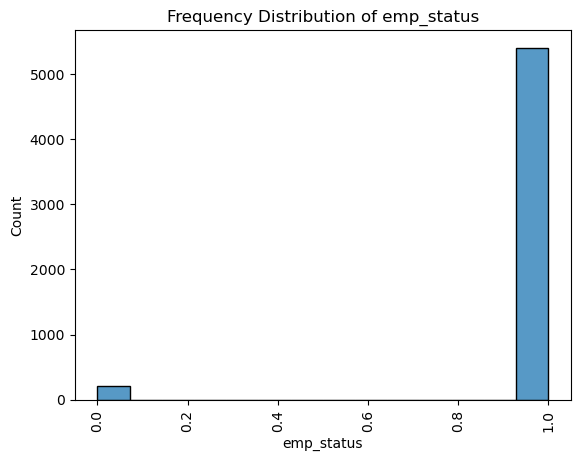

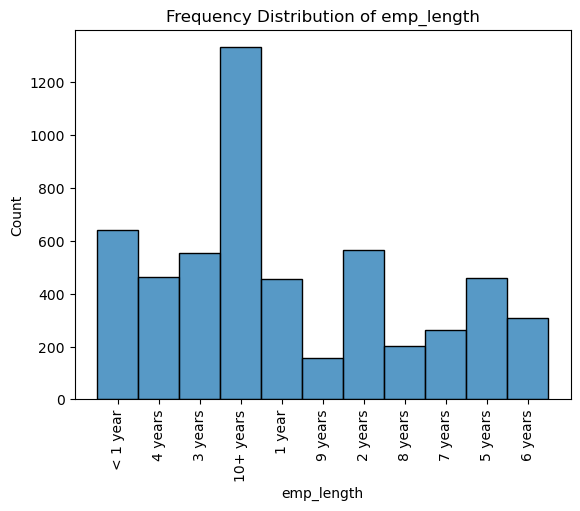

In [31]:
for i in categorical_cols:
    sns.histplot(loan_data_shortlist[i])
    plt.title('Frequency Distribution of '+i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

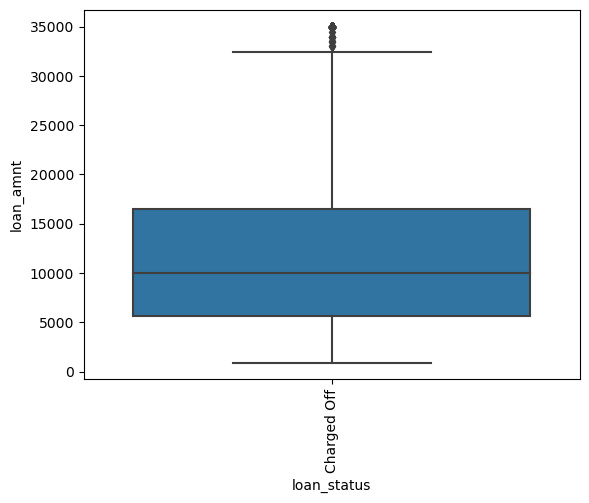

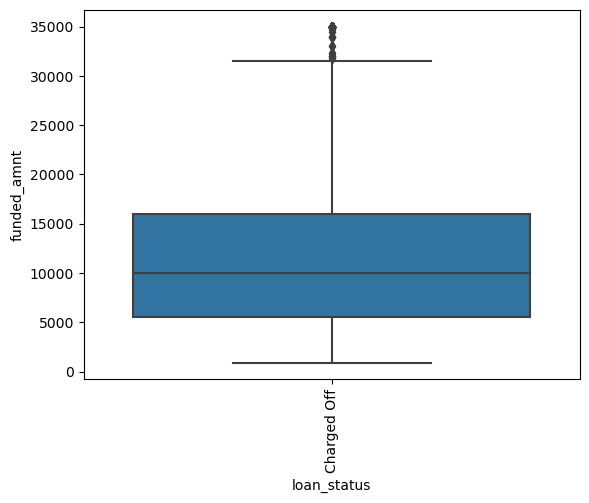

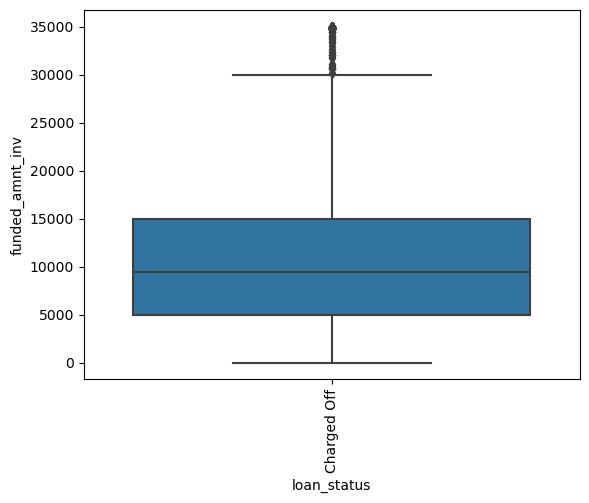

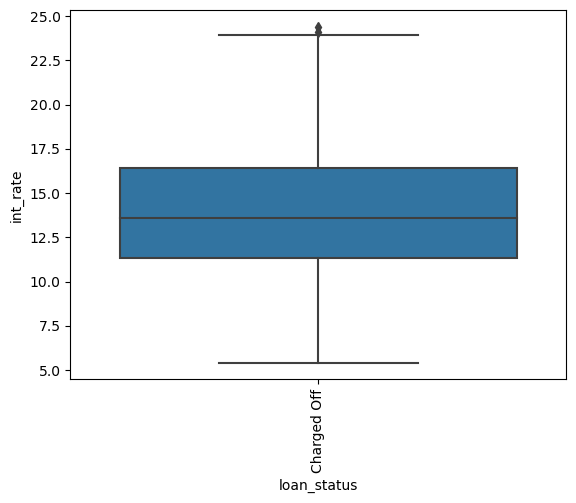

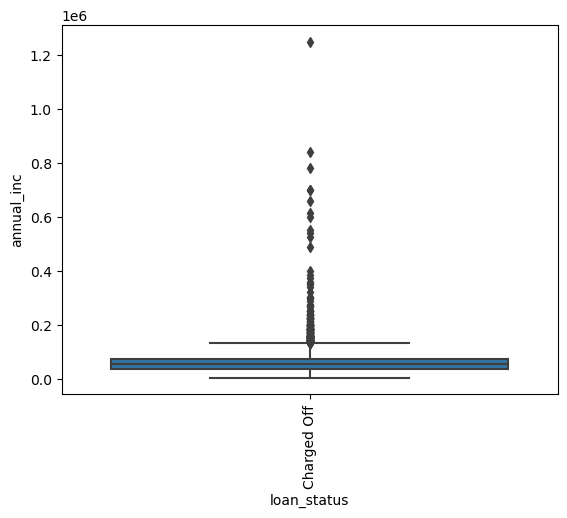

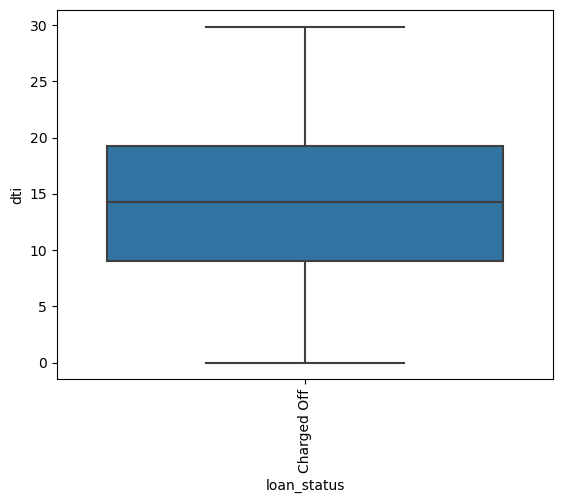

In [32]:
for i in numerical_cols:
    sns.boxplot(x='loan_status',y=i,data=loan_data_shortlist)
    plt.xticks(rotation=90)
    plt.show()

### Observations
. The loan_amnt histogram shows a positively skewed nature. <br>
. Most default cases has been arised for loan amount less than 25000<br>
.  Like the loan_amnt the funded_amnt histogram also shows a positively skewed nature. <br>
. Most default cases has been arised for loan amount less than 25000.<br>
. From the Annual income histplot it has been cleared that the most default cases are of applicants with family income less than 1 lakhs.<br>
. More default cases has been arised for short term loan.<br>
. The most default cases are from group A,B,C,D and E.
. Among which B3,B4,B5,C1 and C2 have the maximum default<br>
. From home ownership histogram plot it is cleared that the applicants who are living in a rent house or in mortage are liable to pay their rent on time so it is more probable that they are failing to repay the loan.<br>
. The graph shows this observation. The count of defaulter with home ownership Rent or mortage is  more than that of applicants with own accomodation.<br>
. The default cases for Not verified applicant is maximum.<br>
. The most default cases are of the type debt_consolidation. 
The applicants were already in debt so there is a high probability that he/ she will fail to repay the amount taken to clear the debt.<br>

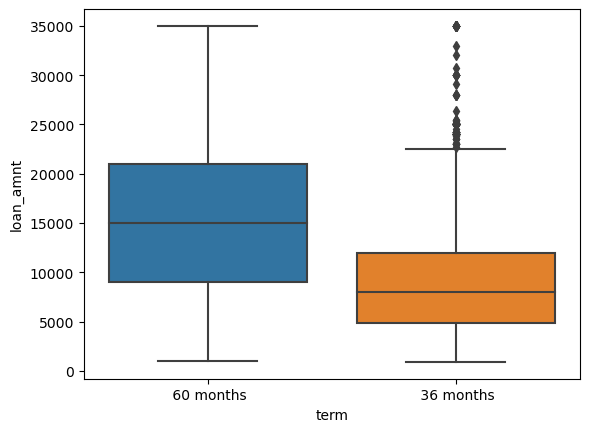

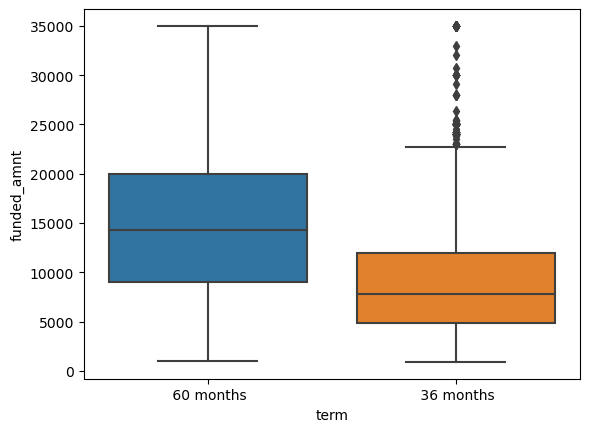

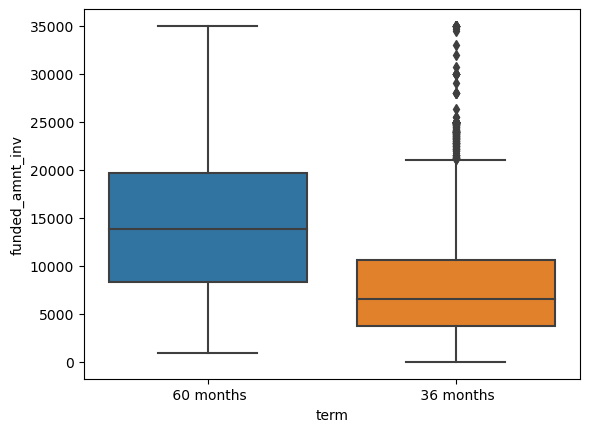

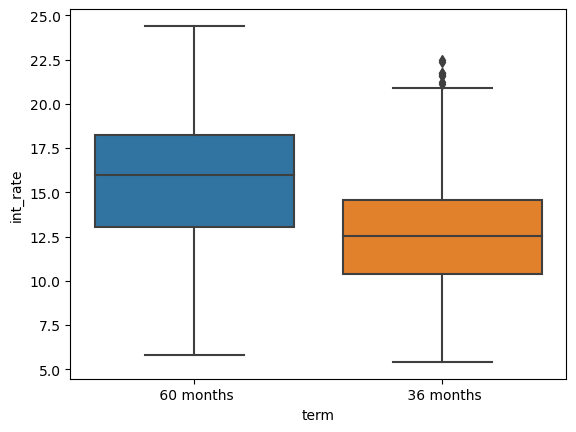

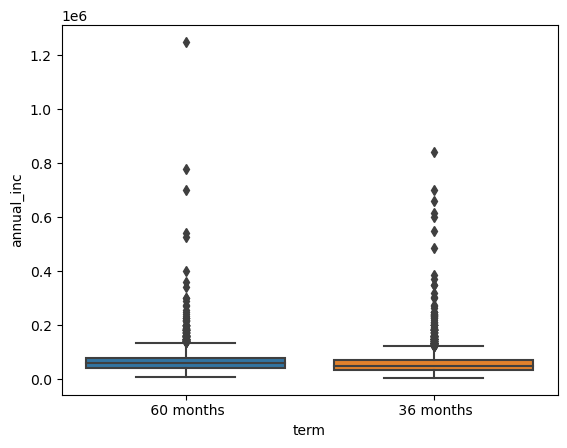

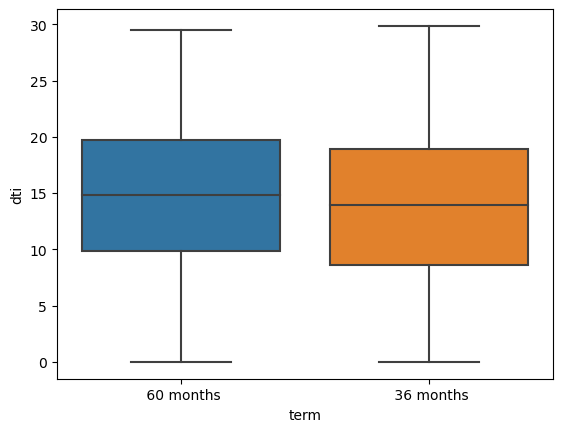

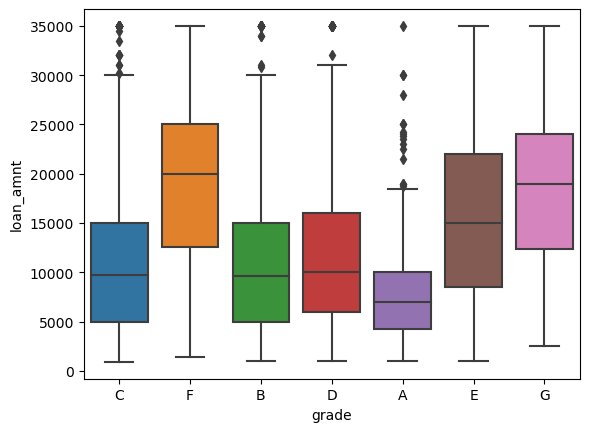

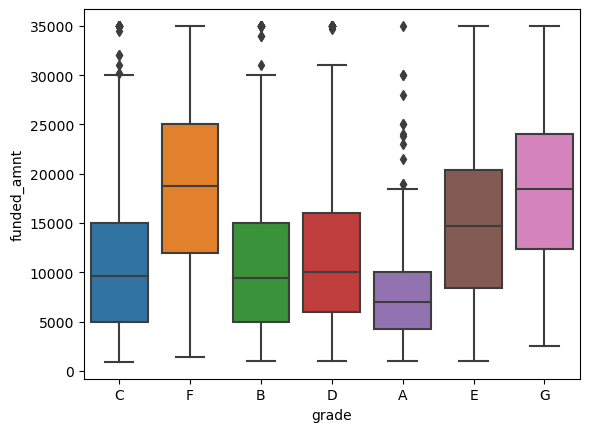

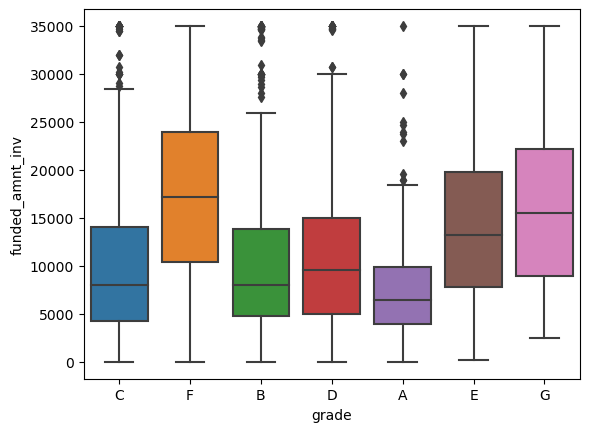

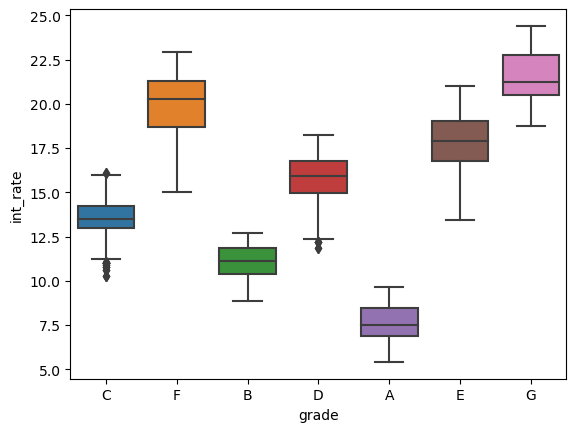

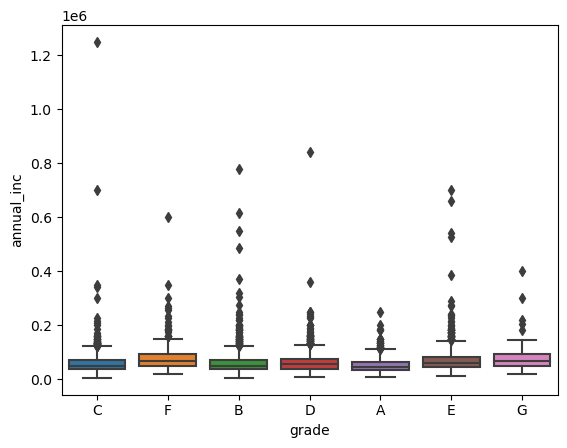

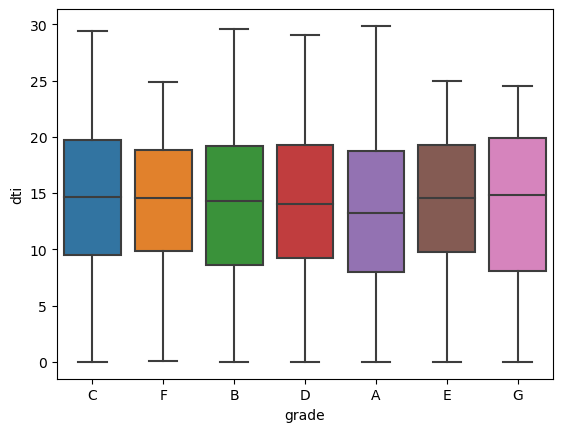

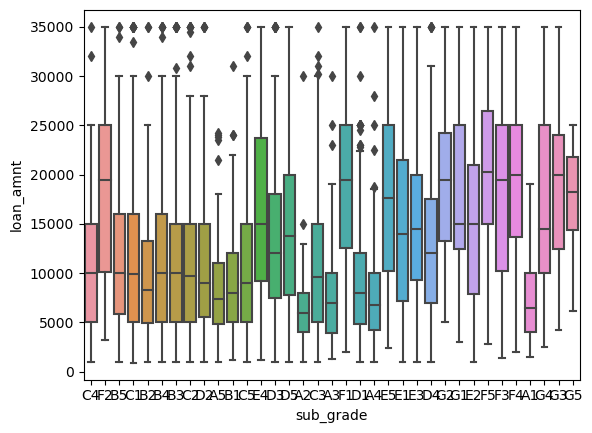

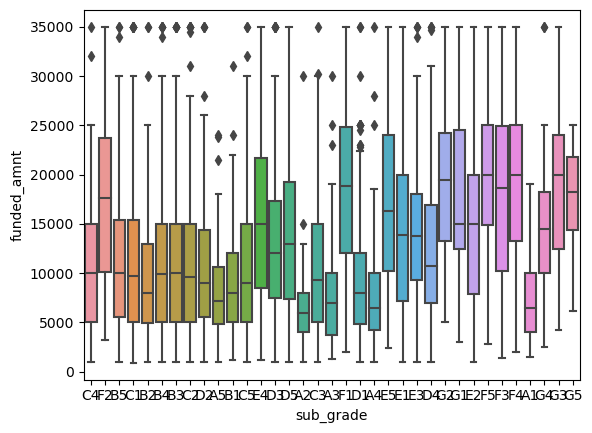

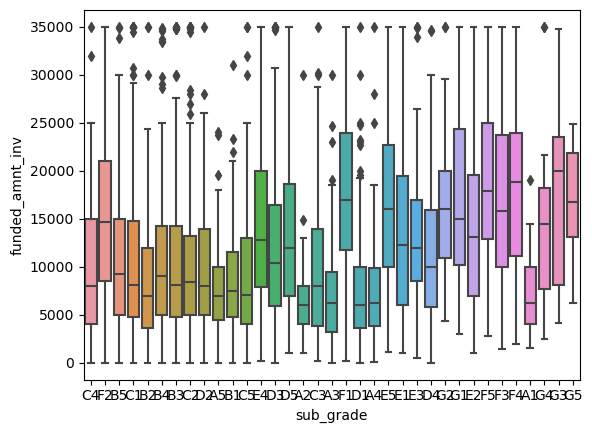

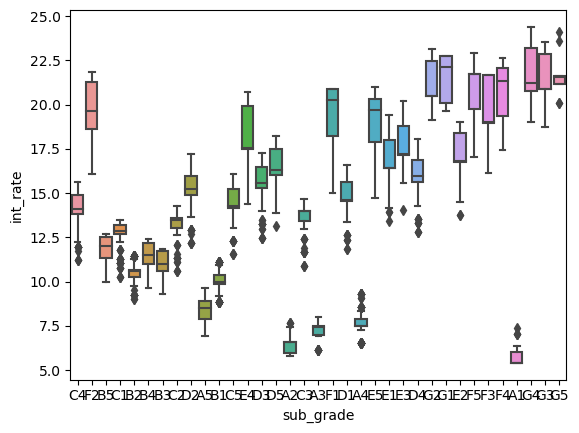

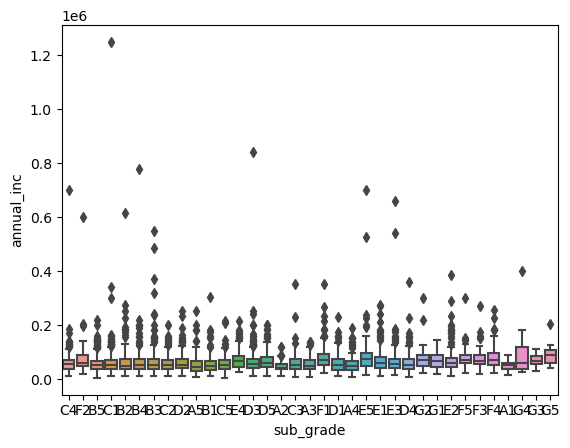

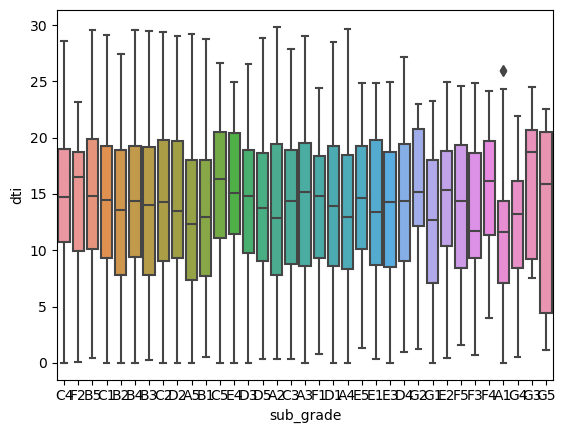

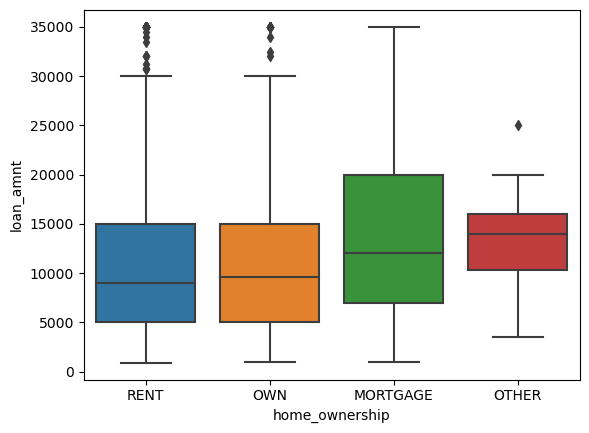

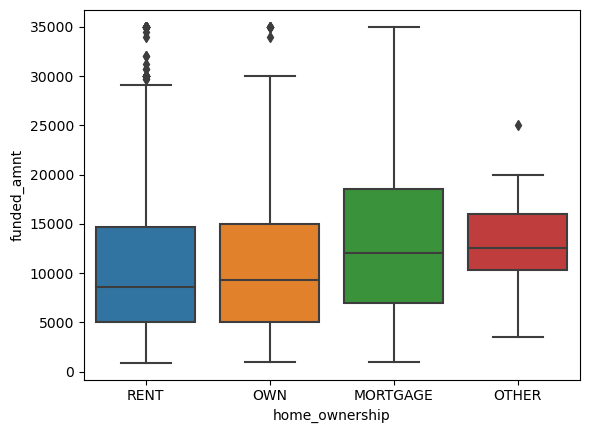

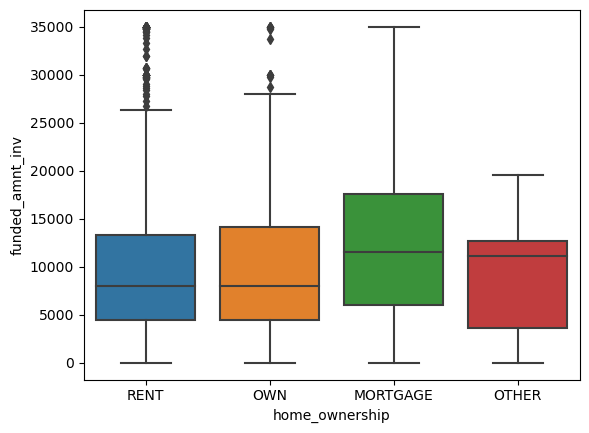

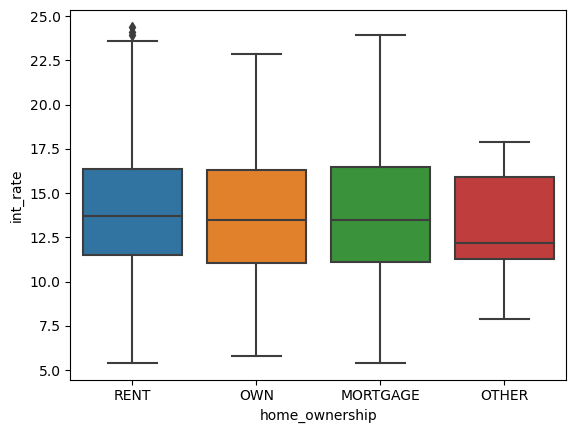

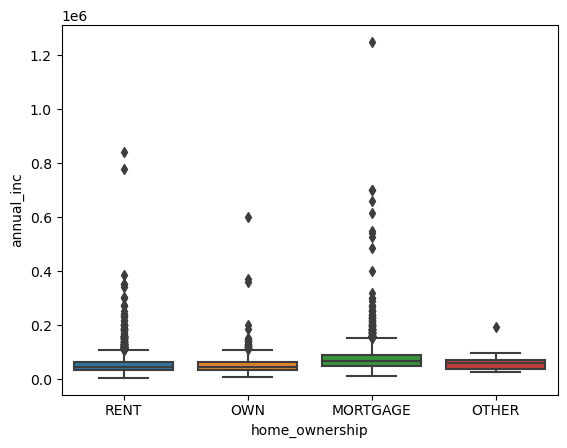

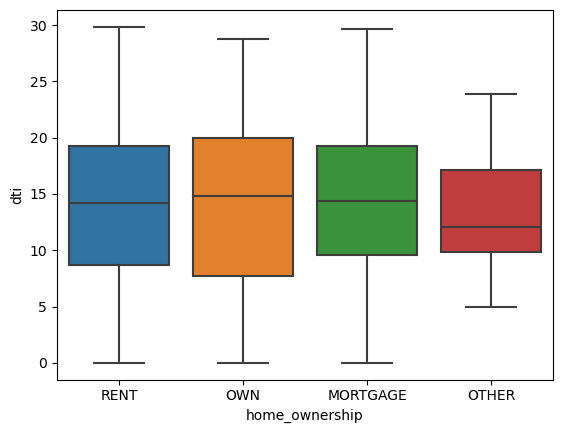

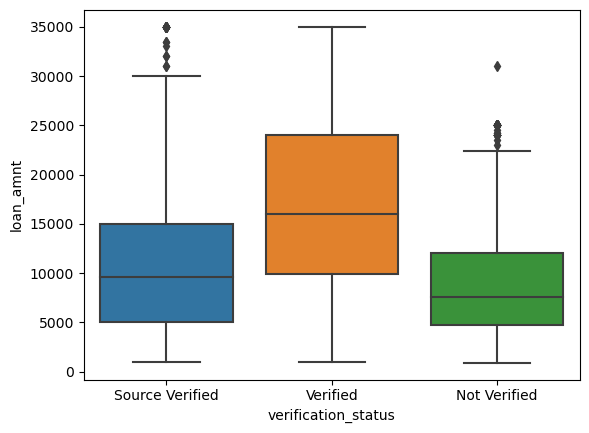

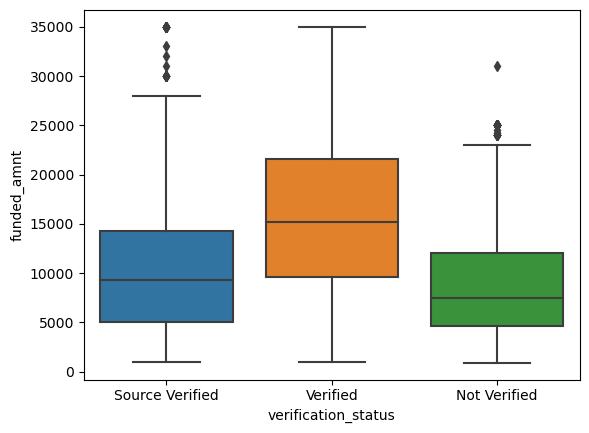

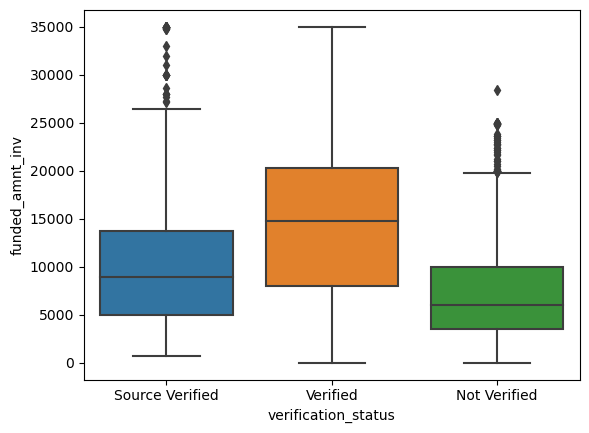

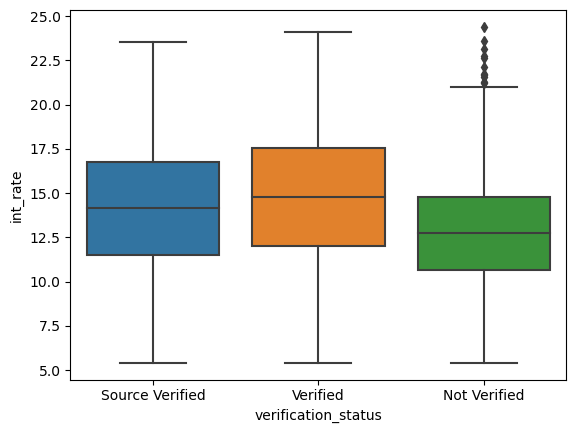

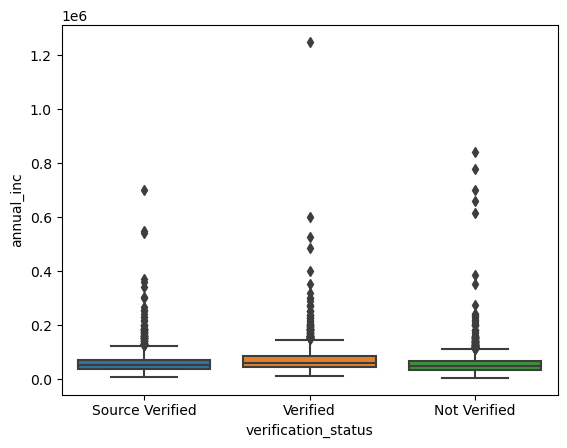

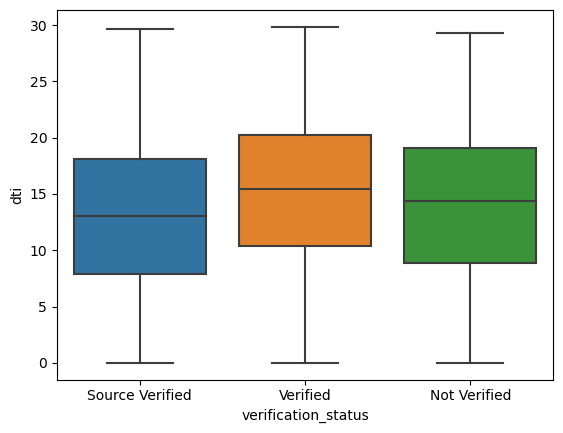

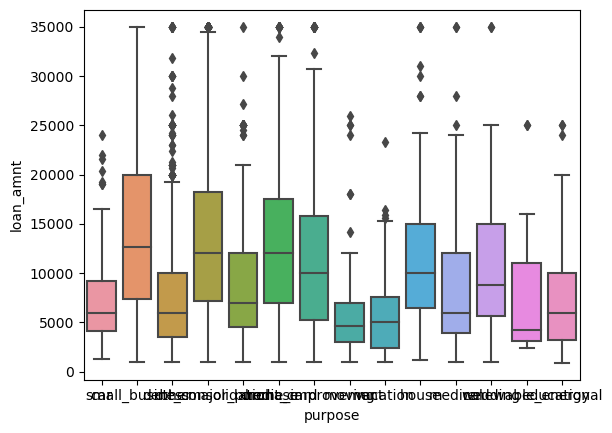

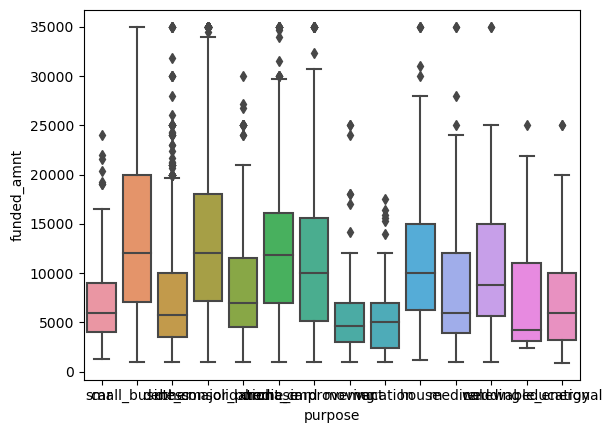

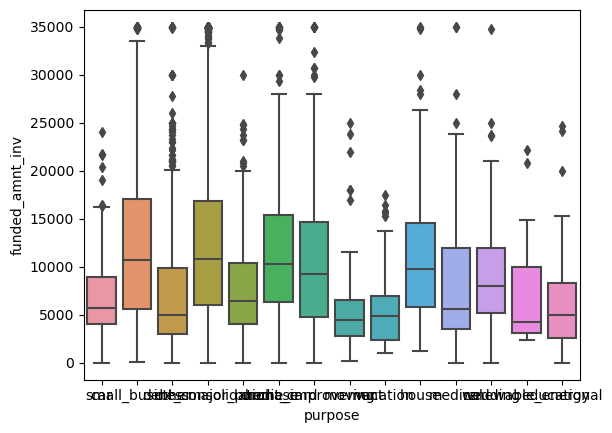

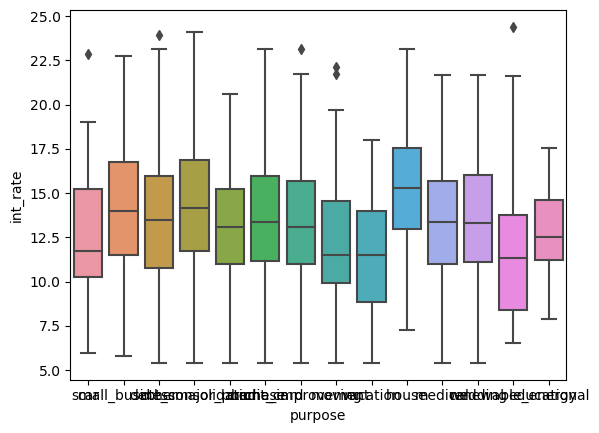

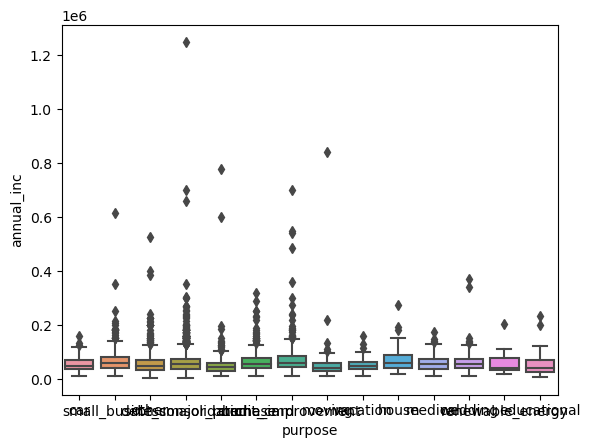

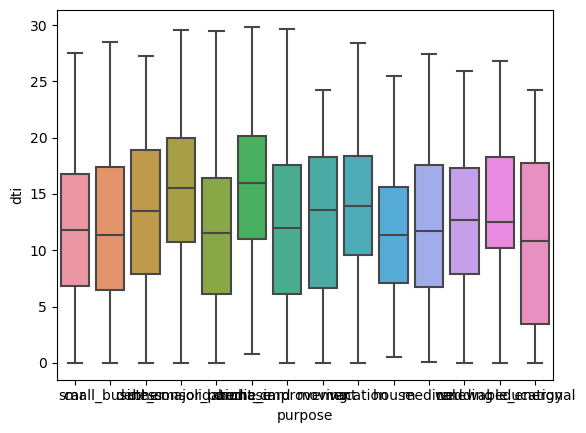

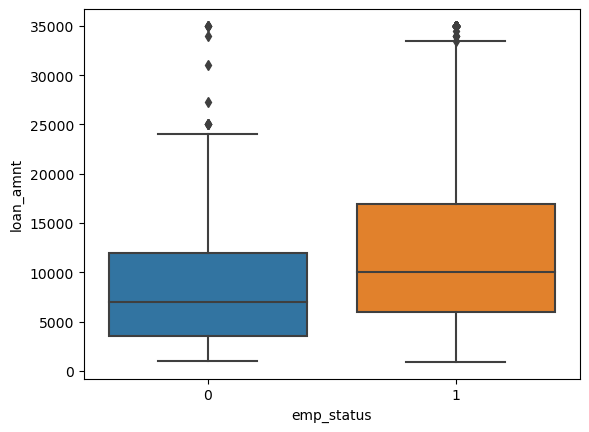

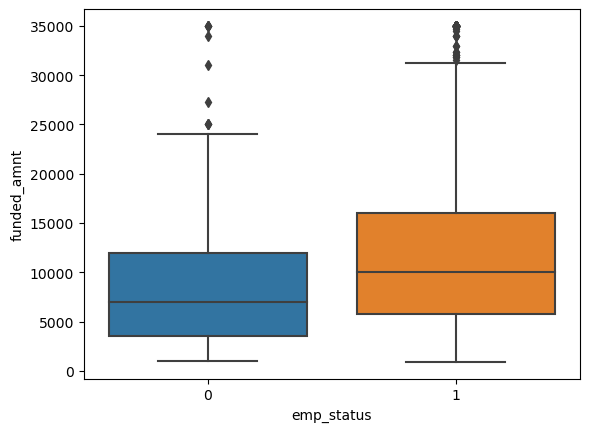

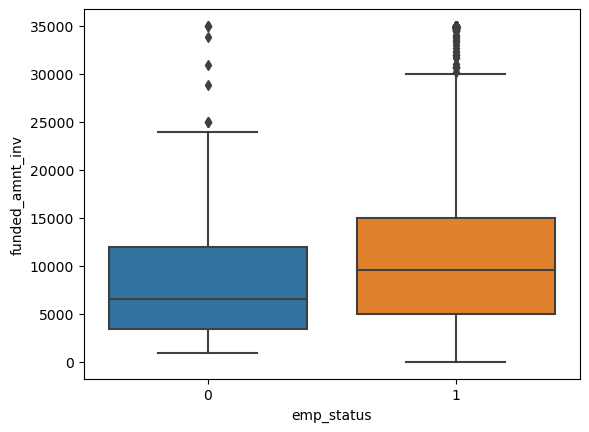

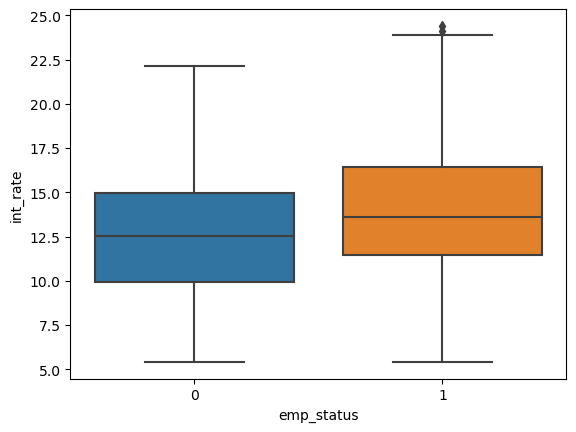

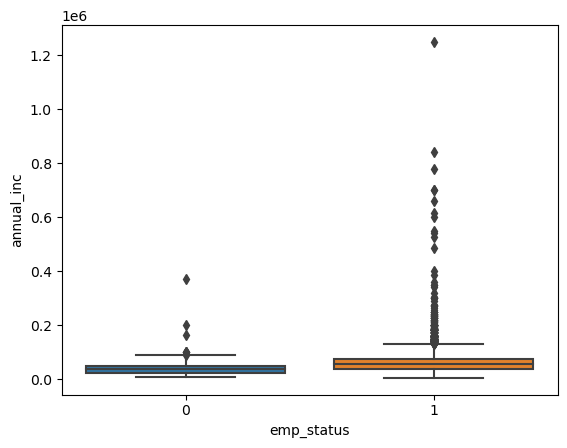

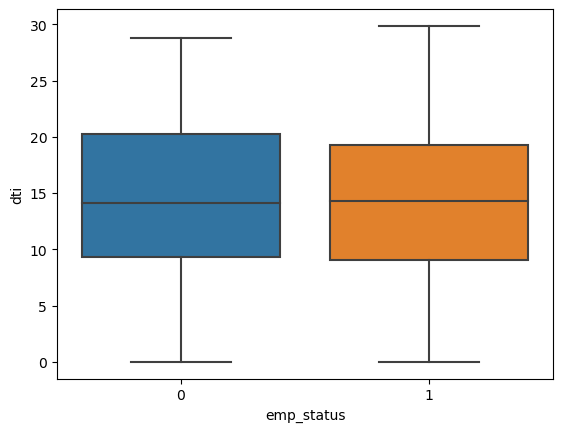

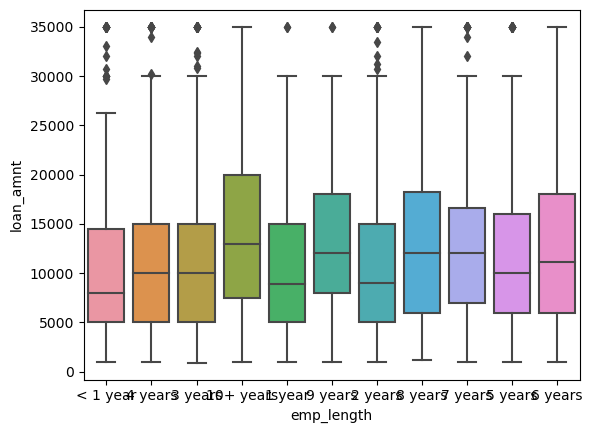

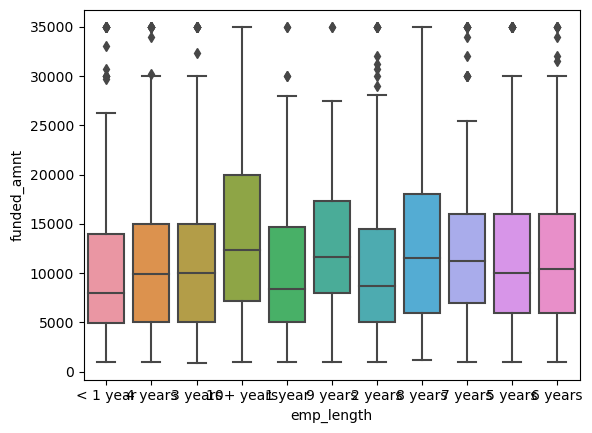

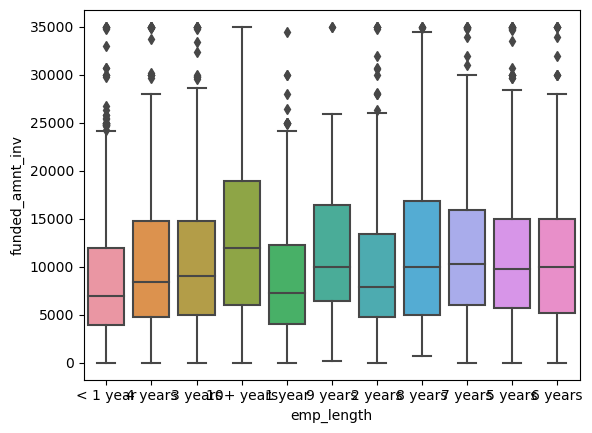

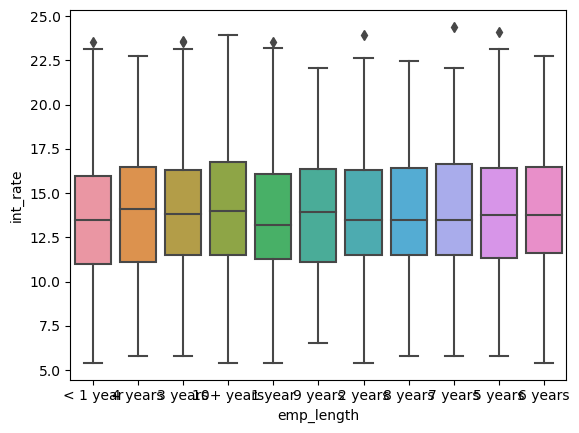

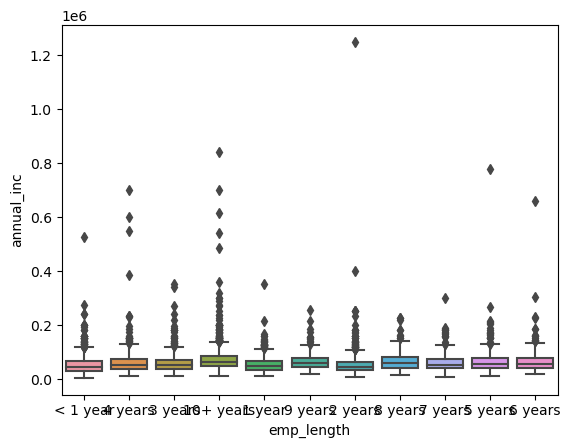

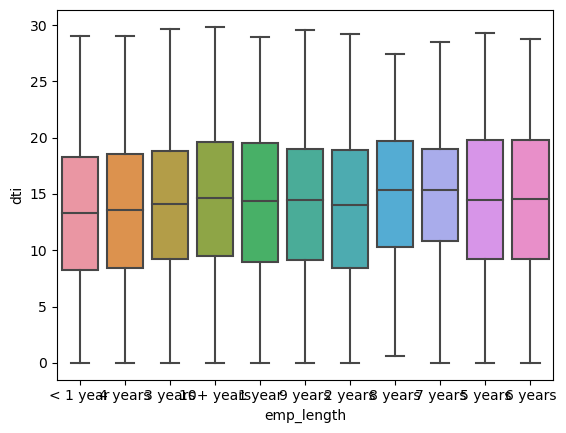

In [33]:
for i in categorical_cols:
    for j in numerical_cols:
        sns.boxplot(x=i,y=j,data=loan_data_shortlist)
        plt.show()

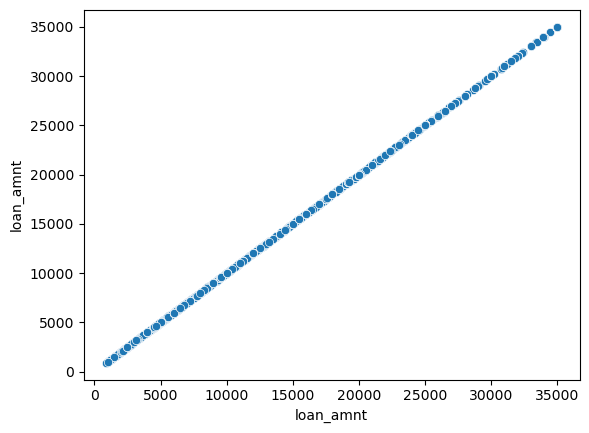

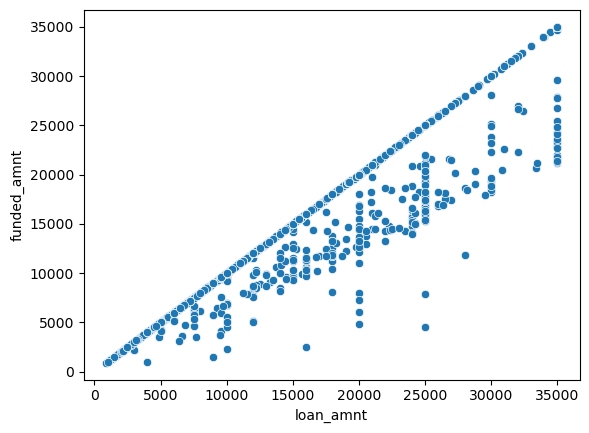

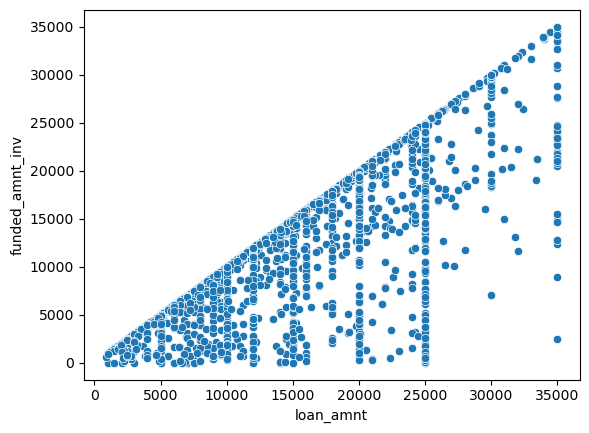

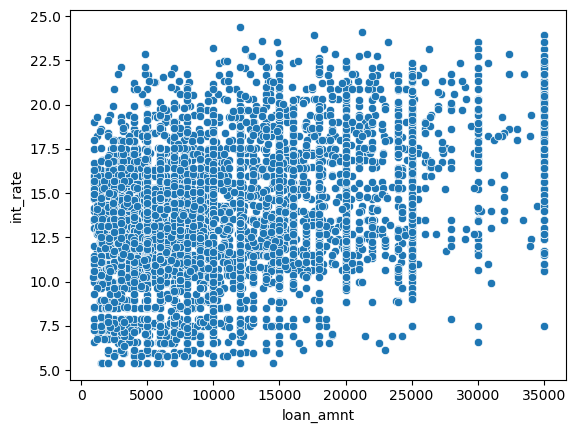

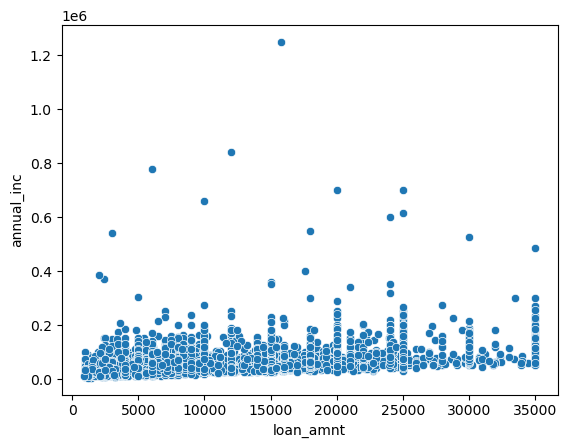

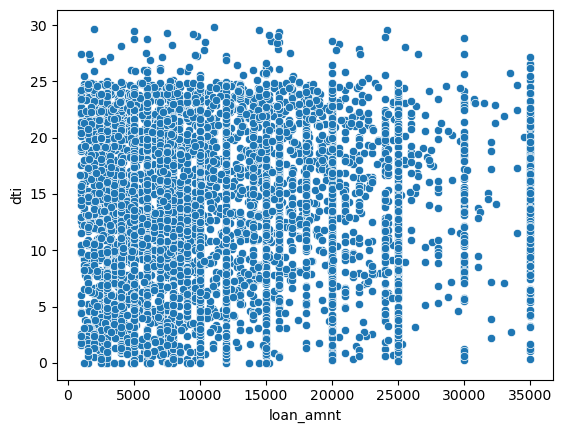

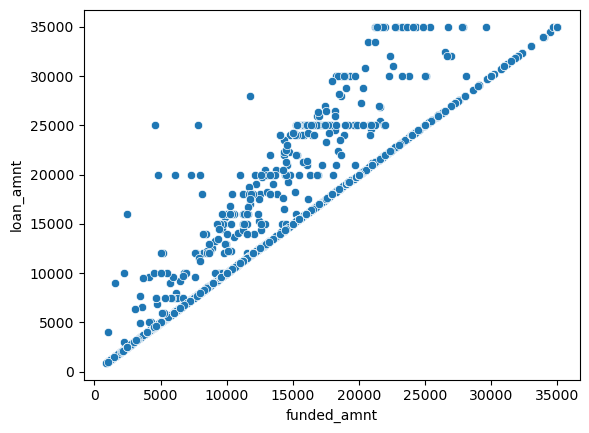

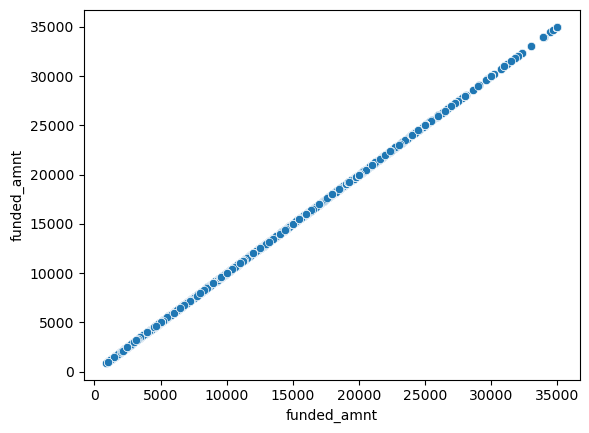

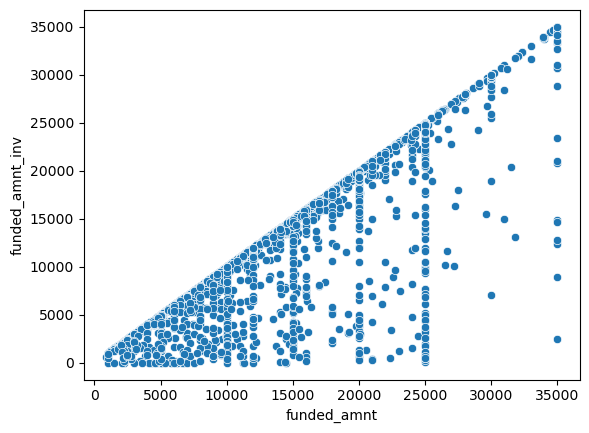

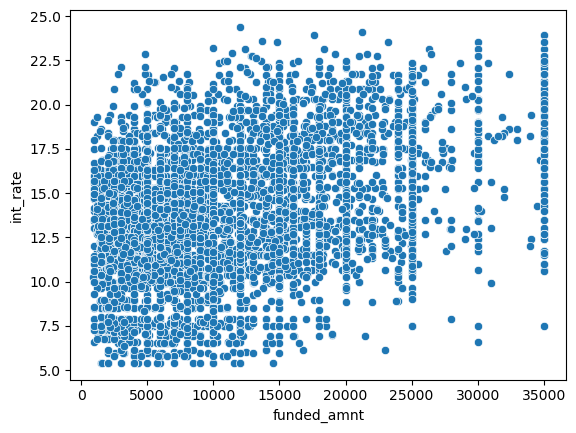

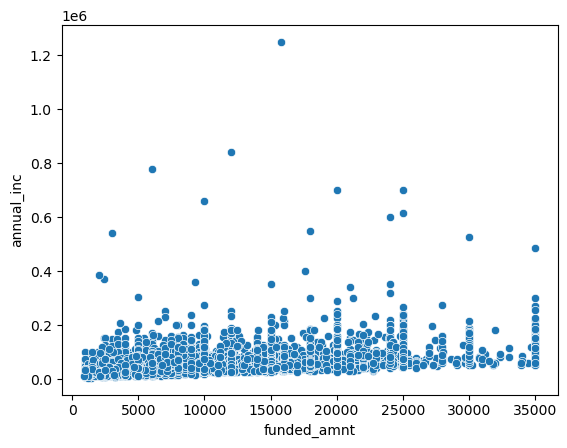

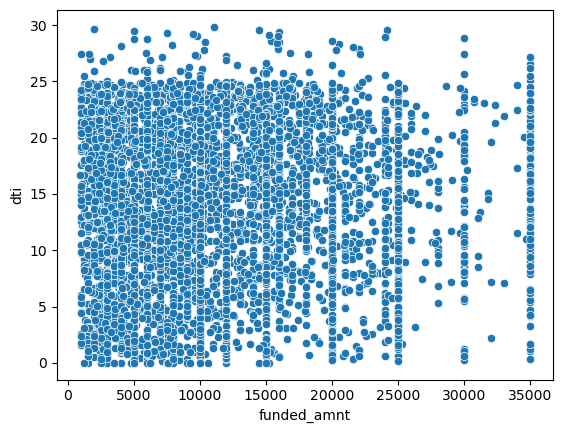

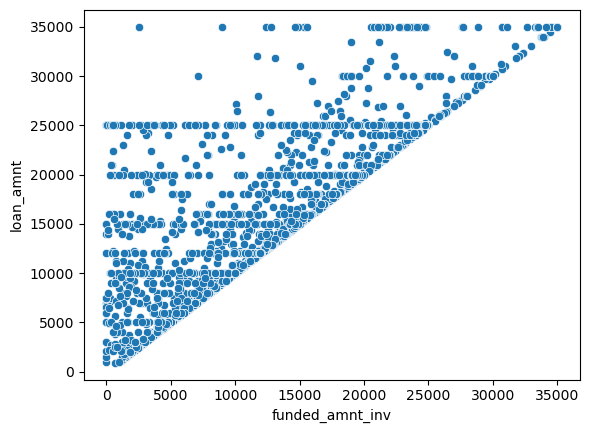

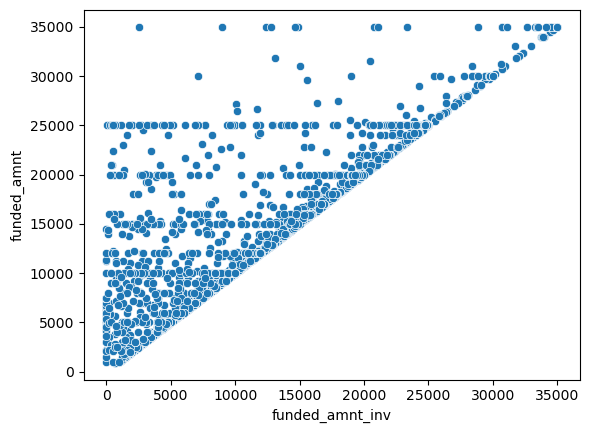

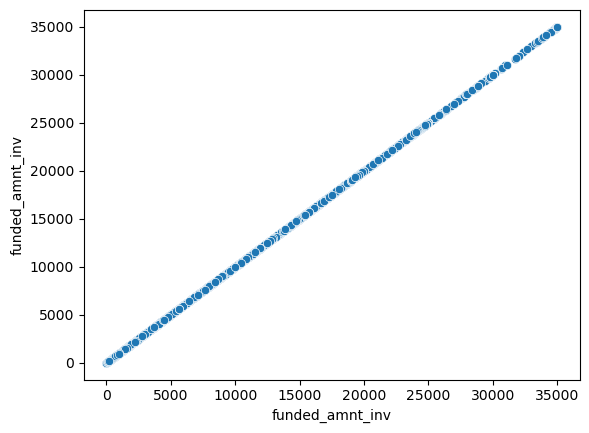

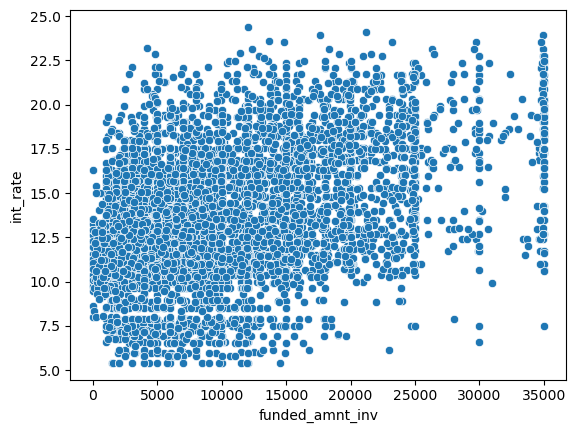

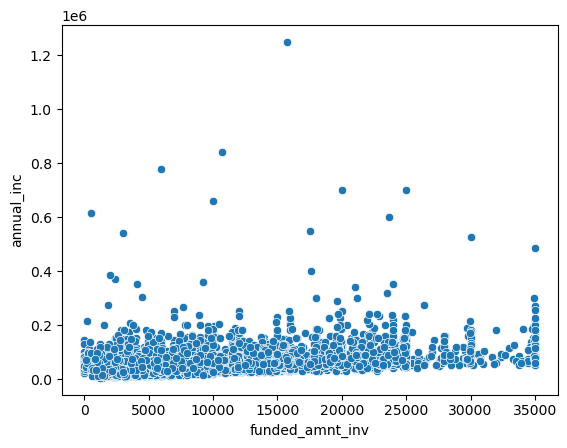

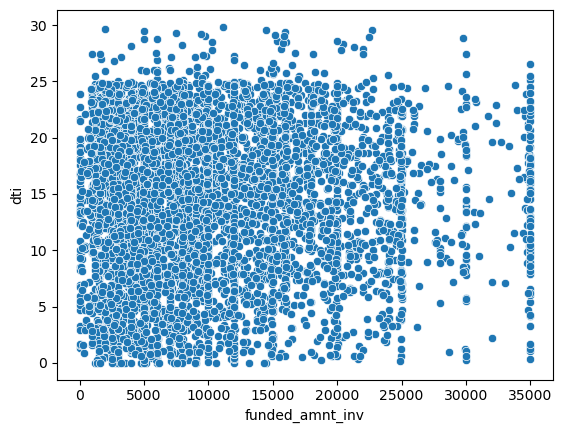

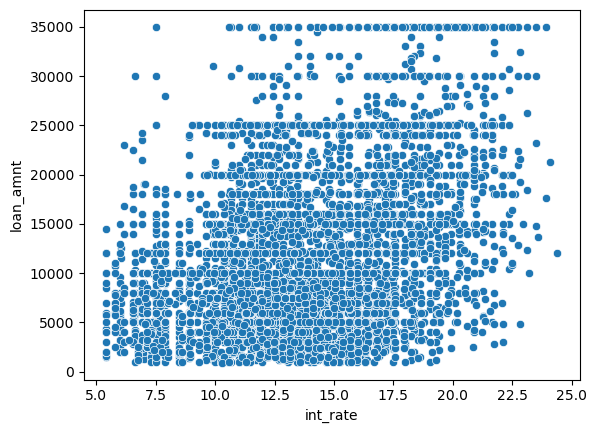

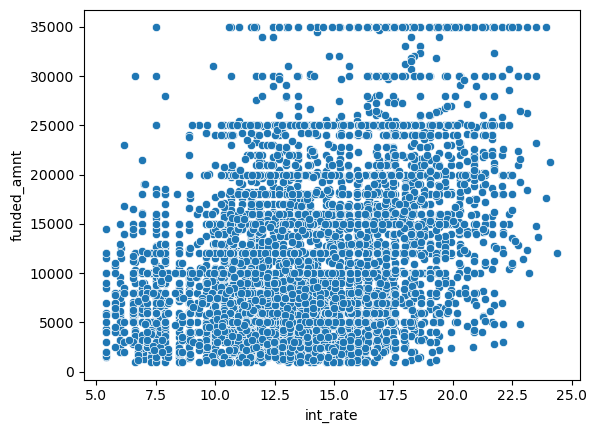

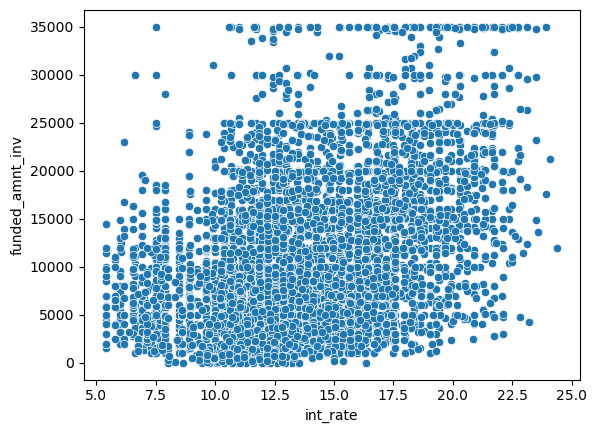

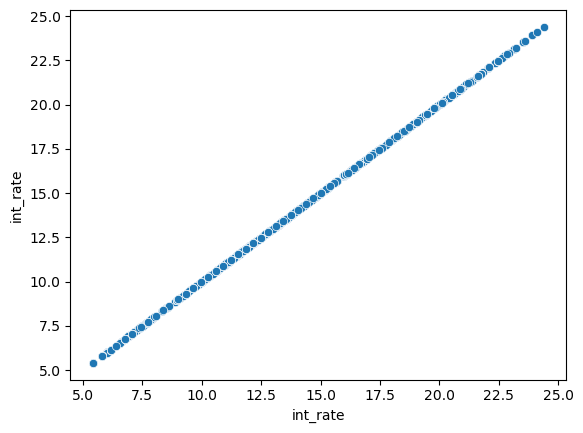

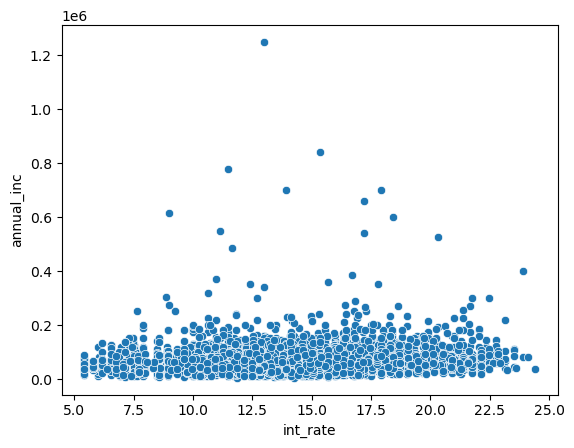

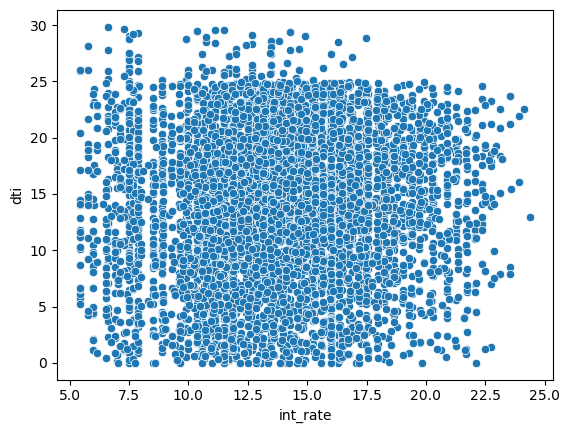

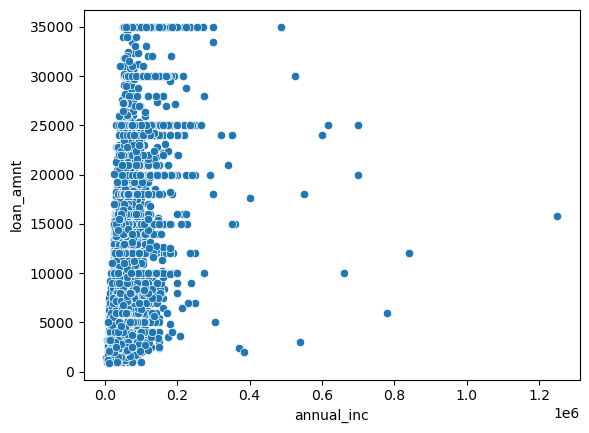

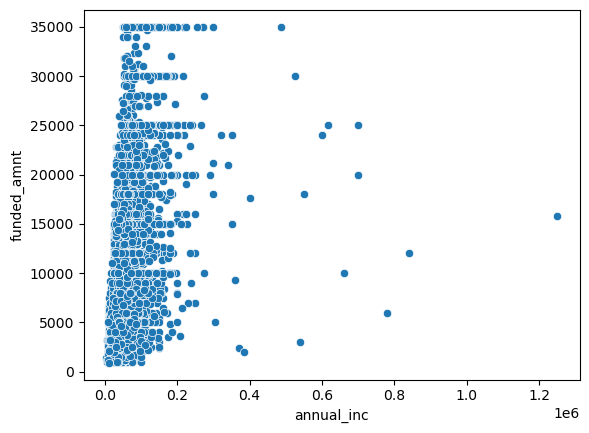

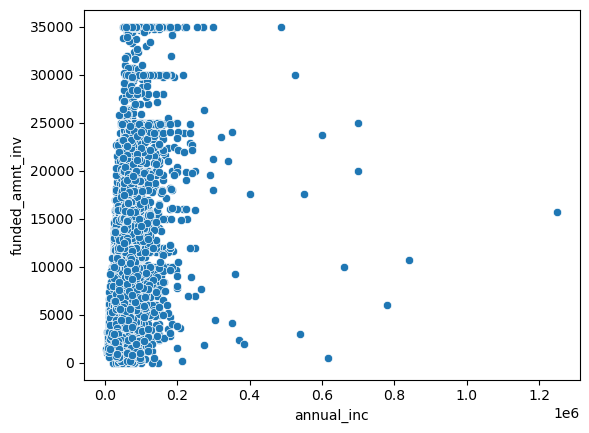

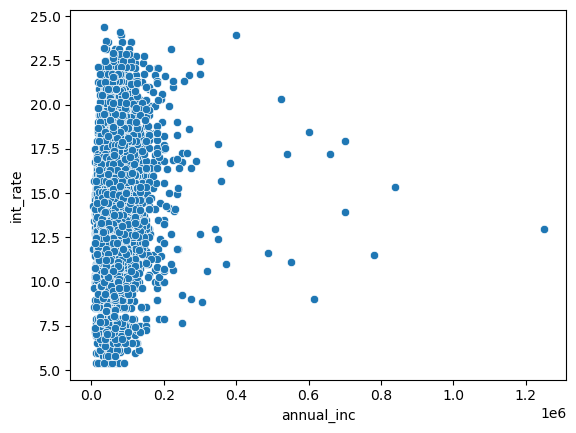

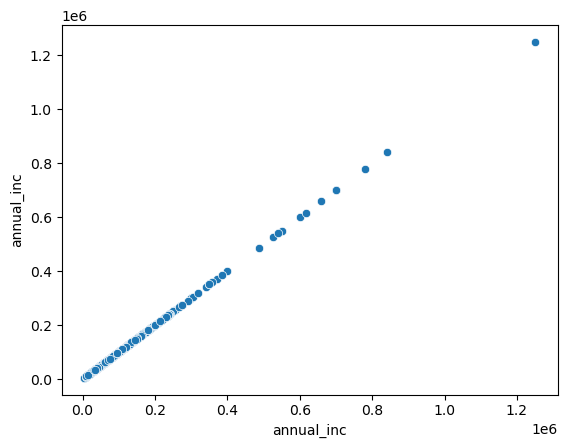

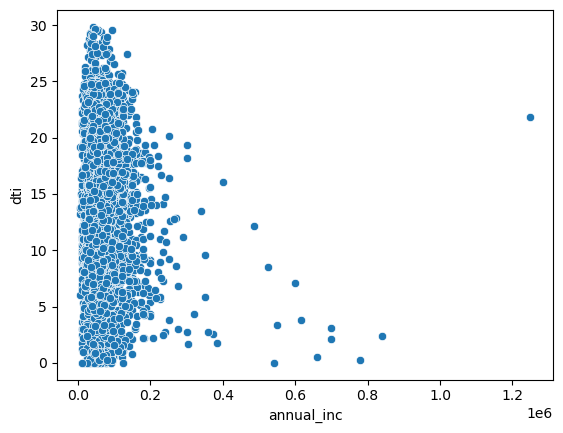

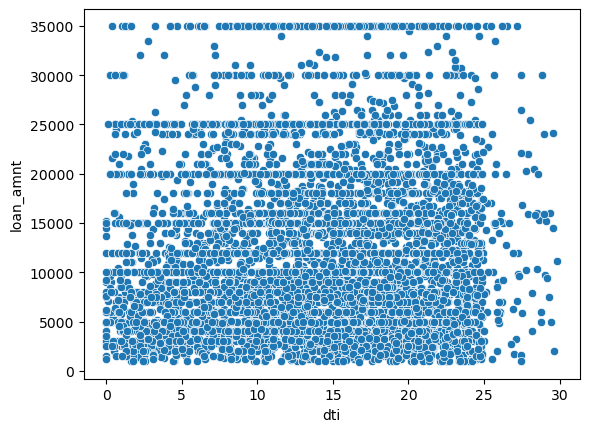

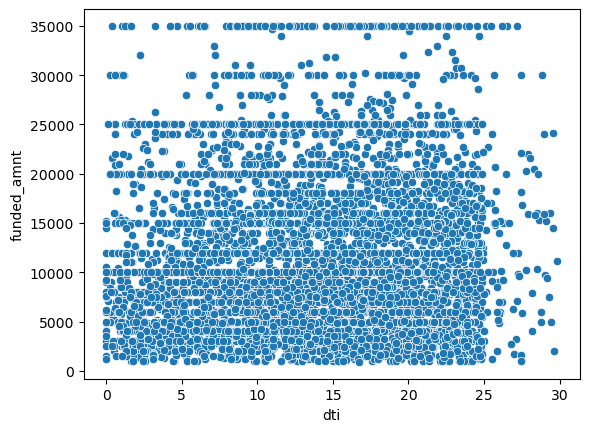

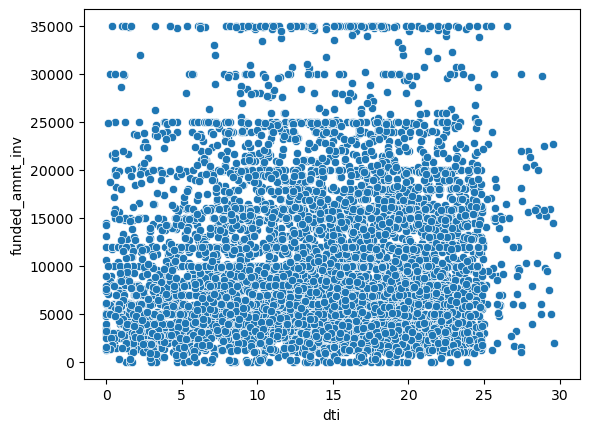

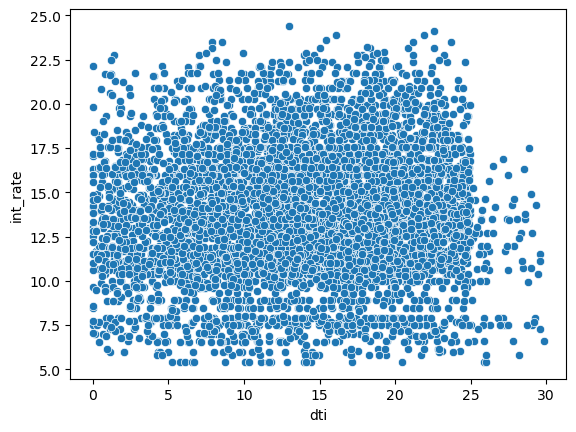

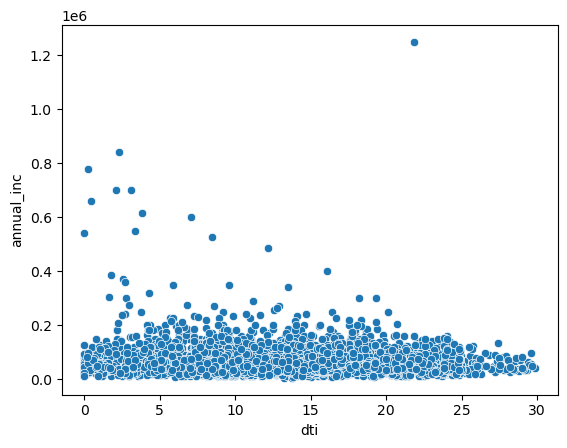

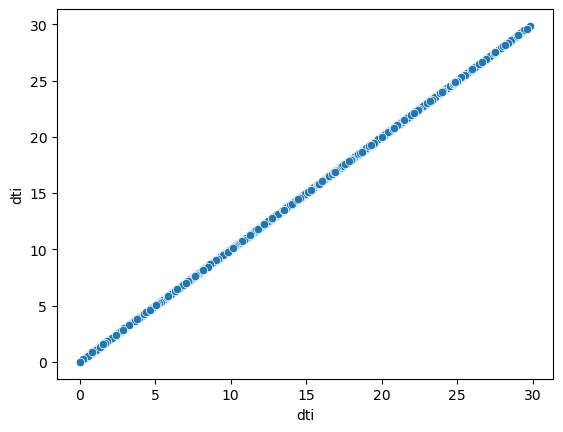

In [34]:
for i in numerical_cols:
    for j in numerical_cols:
        sns.scatterplot(x=i,y=j,data=loan_data_shortlist)
        plt.show()

<AxesSubplot:>

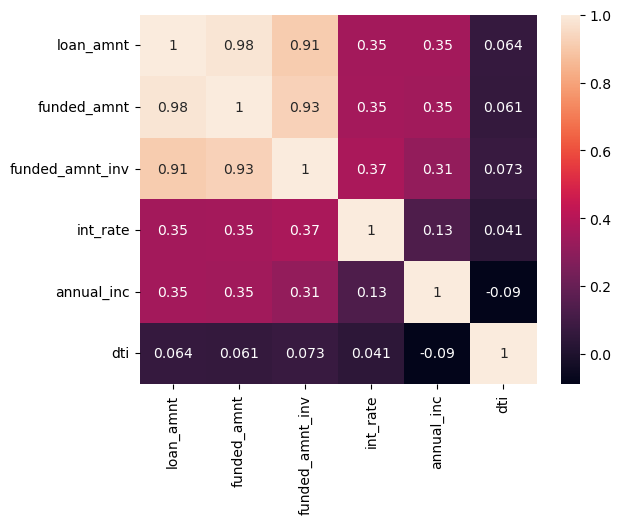

In [35]:
sns.heatmap(loan_data_shortlist[numerical_cols].corr(),annot=True)